In [1]:
# Importing requests to extract content from a url
import requests   
# Beautifulsoup is for web scrapping...used to scrap specific content 
from bs4 import BeautifulSoup as bs 
import re 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob 

In [2]:
#!pip install textblob

In [3]:
def get_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(review)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [30]:
a = 'This was  a disgrace on the screen.  An utter waste of time.'

get_sentiment(a)

'negative'

## Vader Lexicon

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/geethika/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [32]:
sia = SentimentIntensityAnalyzer()
a = 'This was not a disgrace on the screen.  Not An utter waste of time.'
sia.polarity_scores(a)


{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.6072}

In [15]:
def get_vader_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [16]:
# creating empty reviews list 
movie_reviews=[]
#forest = ["the","king","of","jungle"]


ip=[]  
url="http://www.imdb.com/title/tt3521164/reviews?ref_=tt_urv"
#url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
#url = "https://www.amazon.in/All-New-Kindle-reader-Glare-Free-Touchscreen/product-reviews/B0186FF45G/ref=cm_cr_getr_d_paging_btm_3?showViewpoints=1&pageNumber="
response = requests.get(url)
print(response.status_code)
# create soup object to iterate over the extracted content 
soup = bs(response.content,"html.parser")


#print(soup)
# Extracting the content under specific tags  
reviews = soup.findAll("span",attrs={"class","a-size-base review-text-content"})
reviews = soup.findAll("div", attrs={"class","text"})
#for i in range(len(reviews)):
 # empty dictionary to store required params 
rev = [] 


for i in range(1,4):
    parsed_rev = {} 
    parsed_rev['rev_id'] = i
    #parsed_rev['blob_sentiment'] = get_vader_sentiment(reviews[i].text)
    parsed_rev['vader_sentiment'] = get_vader_sentiment(reviews[i].text)
    ip.append(reviews[i].text)  
    rev.append(parsed_rev)
    
# adding the reviews of one page to empty list which in future contains all the reviews
movie_reviews=movie_reviews+ip  
rev

200


[{'rev_id': 1, 'vader_sentiment': 'positive'},
 {'rev_id': 2, 'vader_sentiment': 'positive'},
 {'rev_id': 3, 'vader_sentiment': 'positive'}]

In [33]:
reviews[2].text, rev[2]

("Moana is a return to the classic Disney formula, the clichés and characters ripped from a number of other animated films. However, the pure beauty and skill of the production rises the old story into new heights.Following from the success of Zootropolis, Moana follows a more traditional narrative we know and love; the princess who wishes for something more and is whisked on a supernatural adventure. We know this story so well yet Moana seems fresh and thrilling as if the plot was innovative. Perhaps this is due to the Polynesian setting or the morally ambiguous Maui, played perfectly by Dwayne Johnson, but most likely it is it the simple magic of Disney – the wonder for both children and adults has reached its peak with the perfection of the classic formula. For once, the clichés make the film more enjoyable. The quality of the animation helps too: it's clear they have reached the pinnacle of blending realistic textures with stylised designs, creating an aesthetic beauty that few oth

# Rule Based Approach

In [22]:
# Reading reviews from a text file 
with open("iphone.txt","r",encoding='utf8') as input:
    iphone_reviews = input.read()
type(iphone_reviews)   c

str

In [23]:
# Joinining all the reviews into single paragraph 
#ip_rev_string = " ".join(iphone_reviews)
ip_rev_string = iphone_reviews
# Removing unwanted symbols incase if exists
#ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)


# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")

stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

In [10]:
## Example
ip_rev_string

'["So I got iPhone XR today. The product looks amazing. But unfortunately Face ID working there’s glitch front camera’s portrait mode. That’s fine, may happen. But what’s fine pathetic service provided amazon apple. Firstly, amazon takes responsibility product sold. Talking giant, apple, called market leaders. Went service centre, running diagnostic solution came sending phone Bangalore repair. Like sending new phone repair practical solution company provides charging bomb product. And also mention, amazon.in authorised apple reseller. I guess issue escalated consumer court. Thank amazon apple!","I\'ve android user life I decided try iPhone XR iOS. Loving camera battery life absolute joy have. It\'s one month since I got phone I\'m loving it. Face ID works flawlessly even dark dual sim function working like charm, I\'m using Vodafone primary sim Jio e-sim faced problem whatsoever.\n\nThe camera better compared previous android phone. The camera support "live photo" I disabled I\'m used

In [24]:
#temp = ["this","is","awsome","Data","Science"]
#[i for i in temp if i not in "is"]

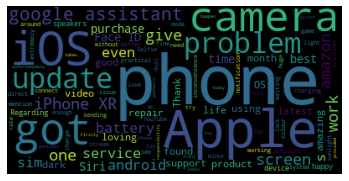

In [25]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


wordcloud_ip = WordCloud(
                      background_color='black',
                      max_words = 100
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

In [26]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[36:]


# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]


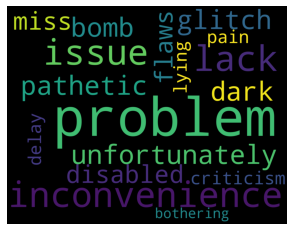

In [27]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")

plt.show()

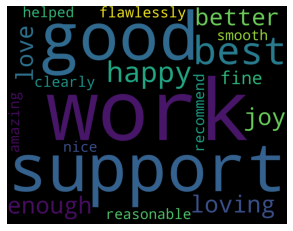

In [28]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.show()

In [16]:
len(ip_pos_in_pos)

248

In [17]:
len(ip_neg_in_neg)

194

In [18]:
len(ip_reviews_words)

614

In [19]:
248/614

0.40390879478827363

In [20]:
194/614

0.31596091205211724

## Amazon Reviews

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [22]:
import numpy as np
import pandas as pd

df = pd.read_csv('amazonreviews.tsv', sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [23]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [24]:
sid.polarity_scores(df.loc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [25]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))
df.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [26]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [27]:
df['scores'][0]['compound']

0.9454

In [28]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [29]:
df.head()

,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
accuracy_score(df['label'],df['comp_score'])

0.7091

In [32]:
print(classification_report(df['label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.86      0.51      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [33]:
print(confusion_matrix(df['label'],df['comp_score']))

[[2623 2474]
 [ 435 4468]]
